# Assignment 1

## Introduction

While biological systems are often very complex, in many cases formulas are available to model these formulas in a mathematical way. These equations and systems of equations can be utilized to model the biological system on a computer in order to sample and model multiple complex systems quickly.  In order to gain a basic understanding of how to do this, 3 different systems were explored in the experiment.  

In the first the growth of bateria in a pertri dish was examined using a differential equation.  The function was integrated and given some intial conditions, the growth constant C was found.  Then the time it took for the density to increase to 8 and 10 times the intial value was found.

In the second part of the experiment a set of data was given, and different fits were applied to the dataset to determine which would fit better.  The data was fit with a linear and an exponential function and the rmsd was found for each of the fits and compared to determine which would fit better.  The differential equations of the functions were then found.  

In the final part of the experiment the SIR model with seasonal epidemics was studied in order to see how the parameters controling the epidemic characteristics effected the system.  The parameters investigated were the death rate, recovery rate, season length, initial infection rate, and the initial amount of infected individuals.  In order to examine this an interactive plot of the variables was created to explore the different combinations.  

## 1 Bacterial Growth

In this part of the experiment, the growth of bacteria in a petri dish was investigated.  The growth of the bacteria is controlled by the following differential equation:

$\frac{\partial{x}}{\partial{t}} = C x$

Where x is the bacteria dencity and C is the growth constant.  In the exerpiment it is assumed that the initial concentration is 10/ml and that the bacteria density doubles every 24 hours.  In order to find the growth constant the equation first had to be integrated.

Integrating $\frac{\delta x}{\delta t} = C x$ gives $x_{t} = x_0 \cdot e^{C t}$.
We know that $x_{0} = 10$ and $x_{20} = 20$, therefore: $20 = 10 \cdot e^{C \cdot 20} \Leftrightarrow 2 = e^{C \cdot 20} \Leftrightarrow log(2) = C \cdot 20 \Leftrightarrow C = \frac{ln(2)}{20} \Leftrightarrow C = 0.03466$.

Or more generally $C = \frac{log(2)}{D}$ where D is the doubling time.

To calculate when a certain increase from the original number has occured we can will in a corresponding multiple of the starting value and solve the formula for $t$: $x_{final} = x_0 \cdot e^{C \cdot t} \Leftrightarrow \frac{x_{final}}{x_0} = e^{C \cdot t} \Leftrightarrow ln(\frac{x_{final}}{x_0}) = C \cdot t \Leftrightarrow t = \frac{ln(\frac{x_{final}}{x_0})}{C}$
In the case of $x_{final} = 80$ this gives $t = 60$ and $x_{final} = 100$ results in $t = 66.4386$.

This is again shown in a calculation in the following block and on the figure following the function is plotted through time. 

In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp

c = 0.03465735902
ratio = np.arange(8, 11,2)
for r in ratio:
    print(r)
    print("To get ",  r, "x initial value of 10, t should be:", math.log(r)/c)

8
('To get ', 8, 'x initial value of 10, t should be:', 60.00000001384513)
10
('To get ', 10, 'x initial value of 10, t should be:', 66.4385619130781)


In [19]:
time = np.arange(0,101,5)
x = [10*math.exp(t*0.034657) for t in time]

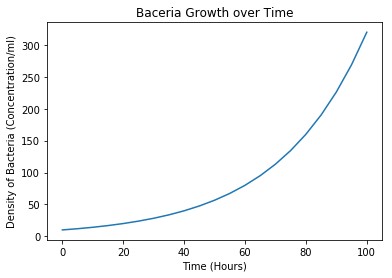

In [20]:
plt.title("Baceria Growth over Time")
plt.xlabel("Time (Hours)")
plt.ylabel("Density of Bacteria (Concentration/ml)")
plt.plot(time, x)

## 2  Fitting linear or exponential to growth data

Often when examining data, it is useful to find the underlying controling function in order to predict how the system is controlled.  In order to do this, functions are fitted t the data based off assumptions made about the underlying dynamics of the govorning equations.  In order to determine if the function fits the data, the error is often examined to detemrine the accurancy of the fit, in addition to other variables such as the complexity.  

In this part of the experiment a data set was given and a linear fit and an exponential fit were applied to the data set and the rmse was taken in order to determine which fit was better.  The resulting functions were plotted and the derivatives were found.  

21
21
(24.978831168831178, -15.92777056277057)
(1.7025883075218307, 1.4153384424892645, 1.48353323690383)


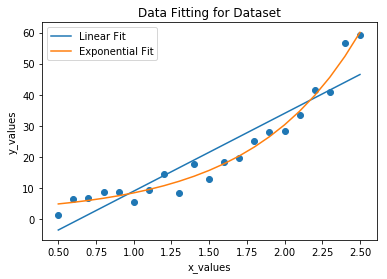

In [16]:
def model_exp(t, A, K, C):
    return A*np.exp(K*t)+C

def fit_exp_nonlin(t, y):
    A = 1
    K = 1
    opt_parms, parm_cov = sp.curve_fit(model_exp, t, y, p0=(A, K, 0))
    A, K, C = opt_parms
    return A, K, C

x_myData = np.arange(0.5, 2.6, 0.1)
y_myData = [1.27,6.58,7.00,8.83,8.66,5.53,9.33,14.57,8.51,17.61,12.94,18.45,19.85,25.03,28.14,28.31,33.41,41.43,40.87,56.71,59.32]
print(len(x_myData))
print(len(y_myData))

plt.scatter(x_myData,y_myData)
m,b = np.polyfit(x_myData, y_myData, 1)
m2,b2 = np.polyfit(np.exp(x_myData), y_myData, 1)
print(m, b)

y_linfit = [x*m+b for x in x_myData]

a, k, c = fit_exp_nonlin(x_myData, y_myData)

y_expfit = [model_exp(x,a,k,c) for x in x_myData]


plt.title("Data Fitting for Dataset")
plt.xlabel("x_values")
plt.ylabel("y_values")
plt.plot(x_myData, y_linfit, label = "Linear Fit")
plt.plot(x_myData, y_expfit, label = "Exponential Fit")
plt.legend()

print(a,k,c)

From the fitting function it can be seen that the equations that would fit the data the best for a linear function and an exponential would be, respectivly:

$y = 24.979x - 15.928$

and

$y = 1.703e^{1.415x}+1.484$ 

In order to determine the average error between the fits the rmse was found.  This can be seen in the next block.

In [15]:
td_l = 0
td_e = 0
for i in range(0,len(y_myData)):
    td_l += np.abs(y_linfit[i]-y_myData[i])*2
    td_e += np.abs(y_expfit[i]-y_myData[i])*2
print("The average error of the linear fit it: ", math.sqrt(td_l))
print("The average error of the exponential fit it: ", math.sqrt(td_e))

('The average error of the linear fit it: ', 14.556060905715842)
('The average error of the exponential fit it: ', 9.534618793173486)


From the figure and the rmseit can be seen that an exponential function fits the data better. 

Finally the derivatives of the two functions (linear and exponential respectibly) were found to be:

$\frac{\partial{y}}{\partial{x}} = 24.979$

and for the exponential taking the form $y = ae^{bx}+c$ the derivative would be $\frac{\partial{y}}{\partial{x}} = abe^{bx}$ therefor:

$\frac{\partial{y}}{\partial{x}} = 2.410e^{1.415x}$

## 3 The SIR Model - Seasonal Epidemics

In [9]:
%matplotlib inline
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

#import numpy as np
#from scipy import integrate
import math
from matplotlib import pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#from matplotlib.colors import cnames
#from matplotlib import animation


def SIR(mu, beta_0, season_length, gamma, I_0, time):
    delta_t = 0.1
    S = 1-I_0
    I = I_0
    R = 0.0
    S_list = []
    I_list = []
    R_list = []
    time_list = []
    for t in range(int(time/delta_t)):
        S_list.append(S)
        I_list.append(I)
        R_list.append(R)
        time_list.append(t*delta_t)
        S_new = S + (mu - mu * S - beta_0 * (1+ math.sin(2*math.pi*t*delta_t/season_length))*I*S) * delta_t
        I_new = I + (beta_0 * (1+ math.sin(2*math.pi*t*delta_t/season_length))*I*S - (gamma+mu) * I) * delta_t
        R_new = R + (gamma * I - mu * R) * delta_t
        S, I, R = S_new, I_new, R_new
    plt.figure()
    plt.plot(time_list, S_list, "r", label = "S")
    plt.plot(time_list, I_list, "b", label = "I")
    plt.plot(time_list, R_list, "g", label = "R")
    plt.xlabel("Time")
    plt.ylabel("Fraction of population")
    plt.legend(loc = "upper right")
    plt.show()
SIR_interact = interactive(SIR, mu=(0.0, 1.0), beta_0=(0.0, 1.0), 
                           season_length=(0.01, 30.0), gamma=(0.0, 1.0), I_0=(0.01, 1.0), time =(10,110))
display(SIR_interact)


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuNSwgZGVzY3JpcHRpb249dSdtdScsIG1heD0xLjApLCBGbG9hdFNsaWRlcih2YWx1ZT0wLjUsIGRlc2NyaXB0aW9uPXXigKY=
